In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import stylia as st
from stylia import NamedColors, ContinuousColorMap, ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH

DATAPATH = "../data"
RESULTSPATH = "../results"

colors = NamedColors()
red = colors.get("red")
blue = colors.get("blue")
purple = colors.get("purple")
yellow = colors.get("yellow")
green = colors.get("green")
orange = colors.get("orange")
gray = colors.get("gray")

## Figure 2C
Number of significant genes per drug in our dataset of 32 drugs

In [36]:
drugs = pd.read_csv(os.path.join("data", "curated_drugs.csv"))
d2g = pd.read_csv(os.path.join(RESULTSPATH, "results_pairs","chemical_gene_pairs_prediction_output_focus_with_variant_aggregates_zscore95_filter.csv" ))
print(len(list(set(d2g["gene"]))), len(list(set(d2g["chemical"]))))
zscore_lim = 1.96
d2g_z95 = d2g[d2g["consensus_zscore"]>=zscore_lim]
print(len(list(set(d2g_z95["gene"]))), len(list(set(d2g_z95["chemical"]))))
d2g_z95.shape

142 32
62 32


(195, 36)

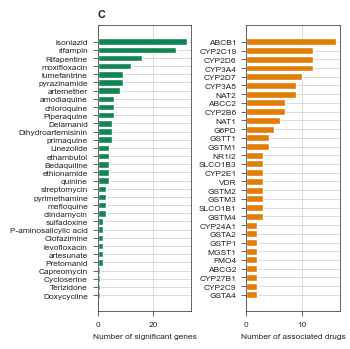

In [47]:
genes_z95_counts = d2g_z95["chemical"].value_counts().reset_index().sort_values(by="count")
chemicals_z95_counts = d2g_z95["gene"].value_counts().reset_index().sort_values(by="count")
fig, axs = st.create_figure(1,2, width=ONE_COLUMN_WIDTH, height=ONE_COLUMN_WIDTH)
ax = axs.next()
ax.barh(genes_z95_counts["chemical"], genes_z95_counts["count"], color=green)
st.label(ax, ylabel="", xlabel="Number of significant genes", title="", abc= "C")
ax = axs.next()
ax.barh(chemicals_z95_counts["gene"].tail(30), chemicals_z95_counts["count"].tail(30), color=orange)
st.label(ax, ylabel="", xlabel="Number of associated drugs", title="", abc= "")
plt.tight_layout()

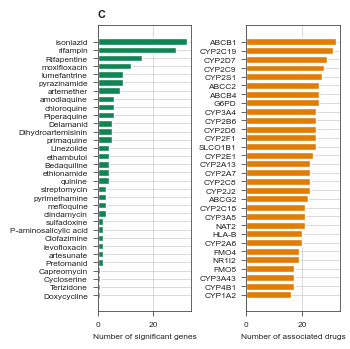

In [48]:
t50 = pd.read_csv(os.path.join(RESULTSPATH, "results_pairs","chemical_gene_pairs_prediction_output_focus_with_variant_aggregates_top50_filter.csv"))
t50_chemicals = t50["gene"].value_counts().reset_index().sort_values(by="count")
fig, axs = st.create_figure(1,2, width=ONE_COLUMN_WIDTH, height=ONE_COLUMN_WIDTH)
ax = axs.next()
ax.barh(genes_z95_counts["chemical"], genes_z95_counts["count"], color=green)
st.label(ax, ylabel="", xlabel="Number of significant genes", title="", abc= "C")
ax = axs.next()
ax.barh(t50_chemicals["gene"].tail(30), t50_chemicals["count"].tail(30), color=orange)
st.label(ax, ylabel="", xlabel="Number of associated drugs", title="", abc= "")
plt.tight_layout()